In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Time window: 10000 seconds (10000000 ms)
Rows to plot: 10000000


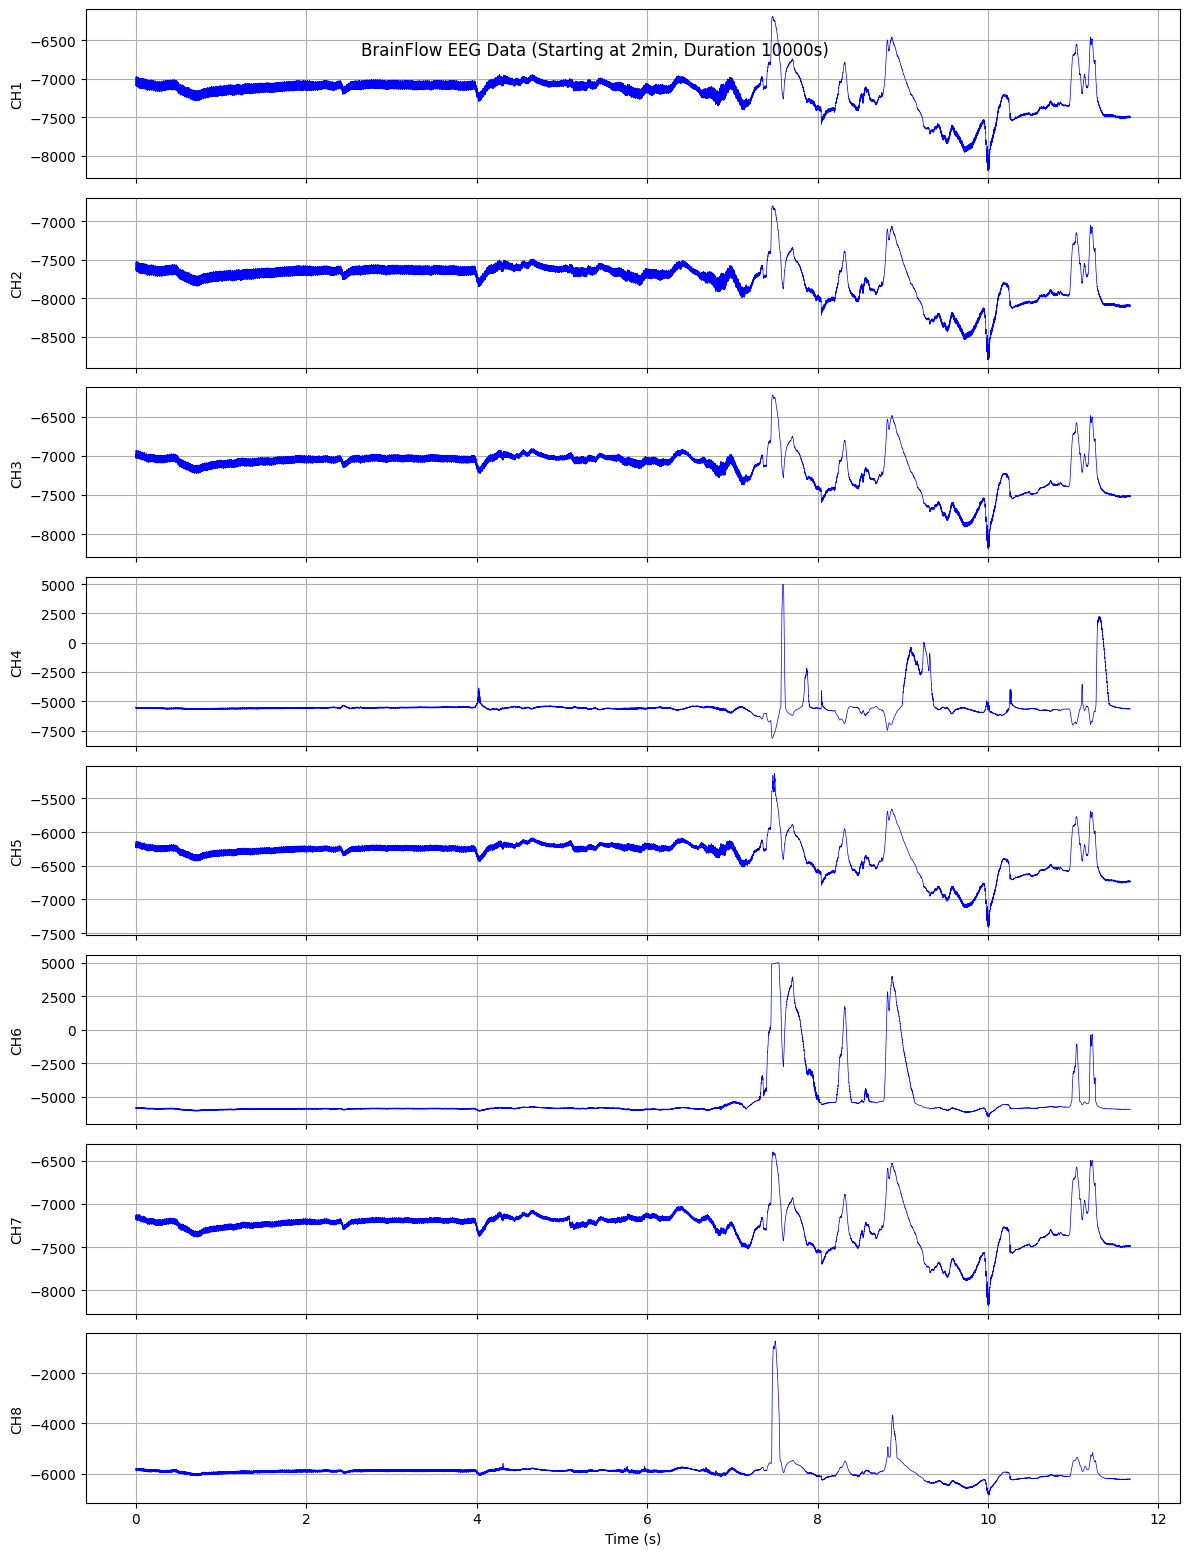

In [38]:
def plot_brainflow_data(filename, seconds=10000):
    # Load the data
    data = pd.read_csv(filename, sep='\t', header=None)
    
    # Define time window (in milliseconds)
    beginning = 1000 * 60 * 2  # 2 minutes in milliseconds
    end = beginning + seconds * 1000  # Add specified seconds
    
    print(f"Time window: {seconds} seconds ({end - beginning} ms)")
    print(f"Rows to plot: {end - beginning}")
    
    # Extract EEG channels (assuming time is in first column)
    eeg_channels = data.iloc[beginning:end, 1:9]  # Channels 1-8 (columns 2-9)
    
    # Create time array in seconds
    time = np.arange(0, len(eeg_channels)) / 1000  # Convert to seconds
    
    # Create figure with subplots for each channel
    fig, axes = plt.subplots(8, 1, figsize=(12, 16), sharex=True)
    
    # Channel labels
    channel_labels = ['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8']
    
    # Plot each channel
    for i in range(8):
        # Convert to proper numpy array and plot
        channel_data = eeg_channels.iloc[:, i].values
        axes[i].plot(time, channel_data, 'b-', linewidth=0.5)
        axes[i].set_ylabel(channel_labels[i])
        axes[i].grid(True)
        # Uncomment and adjust if you want specific y-limits
        # axes[i].set_ylim(-170, -140)  # Adjusted for possible units
        
    # Set labels and title
    axes[-1].set_xlabel('Time (s)')
    plt.suptitle(f'BrainFlow EEG Data (Starting at 2min, Duration {seconds}s)', y=0.95)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()

plot_brainflow_data("bia.csv")